In [1]:
import pandas as pd

df = pd.read_csv("./../local-data/wifi_map_6-10-2025_19_19_26_home_consum.csv", sep=";")

times = df["Time from start (seconds)"].unique()

# splitting the data base on same moment adquisition
subsets = []
for tm in times:
    sub = df.loc[df["Time from start (seconds)"] == tm]
    subsets.append(sub)
subsets[0]

,AP hash,Distance (meters),AP auth mode,Time from start (seconds)
0,f8a4985c,0.62,3,7
1,bab9b9a6,21.54,3,7
2,2d2facaa,21.54,3,7
3,2e41b0ed,23.71,4,7
4,f81b53a0,42.17,3,7
5,f81b53a0,82.54,3,7
6,287de1e8,90.85,3,7
7,58d968cb,100.00,4,7
8,f8fe611,110.07,3,7
9,163976e1,110.07,4,7


In [2]:
# get an array holding all the nearest APs
nearests_uniq = []
for sub in subsets:
    ap_hash = sub.iloc[0, 0]
    if len(nearests_uniq) == 0:
        nearests_uniq.append(ap_hash)
    else:
        if ap_hash not in nearests_uniq:
            nearests_uniq.append(ap_hash)
nearests_uniq

['f8a4985c',
 '9fac872f',
 '2d2facaa',
 '163976e1',
 '797617cf',
 '2e41b0ed',
 '134a1d9f',
 '7b2695be',
 'd29a2ecf',
 'a05232b5',
 '605bd85',
 'a9e6e1e7',
 '3a9a2891',
 'd4491309',
 '1a68a8f4',
 'bb2b203',
 '12baf8bc',
 '8adac450',
 '3c67e392',
 '60a31f0c',
 '49007a45',
 'e7090795',
 '4b14f669',
 'd0529af8',
 'efd387e5',
 'f13370b',
 '1adde51f',
 '3ed35199',
 '1ac4c1e4',
 '9b594de2',
 'c384092b',
 '75f643cd',
 '140fd7c8',
 'ad714a31',
 'efe5a066',
 '391761fa',
 '157b7533',
 'f593f9dc',
 'f61396d9',
 'aa9ea42e',
 '8809dba3',
 'c56fa45a',
 '41f7e83',
 '1c068866',
 '12f623f',
 '21bbd6c4',
 '4263ac16',
 '34b7eab2',
 '72cccab1',
 '70bda5ac',
 'b8deaac9',
 'a2ac5fd2',
 '1fac1d17',
 '772632d5',
 'b4efb15b',
 '4d073fff',
 'f88819ce',
 '9fabb49b',
 '4272a8f3',
 '200b1c8e',
 '847f497',
 '1c205256',
 '12c58c0b',
 'fbeb2177',
 'dd178b2b',
 'ed511bd4',
 '459ffd3f',
 '6c18b41e',
 '5d6709f5',
 '43c747f7',
 'f2c03fda',
 '39be15ac',
 '43554763',
 'fecf1445',
 '8236fa27',
 '930202dd',
 '6f150b67',
 'bbc

In [3]:
# get all data related with the nearest APs
interest_aps = []
for closer in nearests_uniq:
    interest_aps.append(df.loc[df["AP hash"] == closer])
interest_aps

[      AP hash  Distance (meters)  AP auth mode  Time from start (seconds)
 0    f8a4985c               1.10             3                          7
 13   f8a4985c               1.78             3                         10
 29   f8a4985c               0.56             3                         14
 49   f8a4985c              11.01             3                         18
 69   f8a4985c               2.15             3                         21
 85   f8a4985c               2.87             3                         25
 101  f8a4985c               4.64             3                         28
 117  f8a4985c               2.87             3                         32
 132  f8a4985c               2.37             3                         35
 146  f8a4985c               4.64             3                         39
 160  f8a4985c               4.22             3                         43
 176  f8a4985c               2.15             3                         46
 191  f8a4985c           

In [4]:
# calculating the total distance walked

walked_distance = 0
time = 0
for i, aps in enumerate(interest_aps):
    if i == 0:
        walked_distance += interest_aps[i].tail(1).iloc[0, 1]
        time = interest_aps[i].tail(1).iloc[0, 3]
    else:
        row = interest_aps[i].loc[df["Time from start (seconds)"] == time]
        if not row.empty:
            latest_row = interest_aps[i].tail(1)
            time = latest_row.iloc[0, 3]
            start_dst = row.iloc[0, 1]
            end_dst = latest_row.iloc[0, 1]
            delta_dst = abs(start_dst - end_dst)
            walked_distance += delta_dst
            if len(interest_aps) - 1 == i:
                walked_distance += end_dst

(walked_distance, time)

(np.float64(1043.48), np.int64(705))

In [5]:
# drawing for the revelant APs the distance on time
# commented since seems that is very memory consuming

# for i_ap in interest_aps:
#     i_ap.plot.scatter(
#     x="Time from start (seconds)",
#     y="Distance (meters)",
#     grid=True,
#     title=i_ap.iloc[0,0],
#     figsize=(2,3))

<Axes: title={'center': '797617cf'}, xlabel='Time from start (seconds)', ylabel='Distance (meters)'>

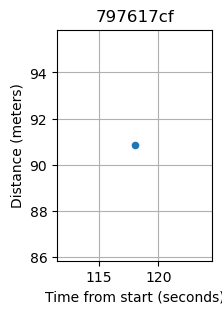

In [5]:
# drawing for the revelant AP the distance on time
i = 4
interest_aps[i].plot.scatter(
    x="Time from start (seconds)",
    y="Distance (meters)",
    grid=True,
    title=interest_aps[i].iloc[0, 0],
    figsize=(2, 3),
)